In [1]:
import pandas as pd
import numpy as np
import utils
import datetime
import plotly.graph_objects as go
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.figure_factory as ff

In [2]:
df_movies_meta = pd.read_csv('~/Downloads/the-movies-dataset/movies_metadata.csv')
credits_df = pd.read_csv('~/Downloads/the-movies-dataset/credits.csv')


# df_movies = utils.pre_processing_movies_data(df_movies)

/home/assisfelix/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
credits_df.head()
len(df_movies_meta)

45466

In [4]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [5]:
df_movies_meta['id'] = df_movies_meta['id'].apply(convert_int)

In [6]:
df_movies_meta[df_movies_meta['id'].isnull()]

adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...   

                                                homepage  id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso... NaN       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o... NaN       0   
35587           [{'iso_3166_1': 'CA', 'name': 'Canada'}] NaN       0   

      original_language                            original_title  overview  \
19730             104.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
29503              68.0      [{'iso_639_1': 'ja', 'name': '日本語'}]  Released   
35587              82.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

       ... release_date revenue runtime spoken_languages status  tagline  \
19730  ...            1     NaN     NaN              NaN    NaN      NaN   
29503  ...           12     NaN     NaN              NaN    NaN      NaN   
35587  ...           22     NaN     NaN              NaN    NaN      NaN   

       title video vote_average vote_count  
19730    NaN   NaN          NaN        NaN  
29503    NaN   NaN          NaN        NaN  
35587    NaN   NaN          NaN        NaN  

[3 rows x 24 columns]

In [7]:
len(df_movies_meta)

45466

In [8]:
df_movies_meta = df_movies_meta.drop([19730, 29503, 35587])

In [9]:
len(df_movies_meta)

45463

In [10]:
df_movies_meta['id'] = df_movies_meta['id'].astype('int')
df_movies_meta = df_movies_meta.merge(credits_df, on='id')
df_movies_meta.shape

(45538, 26)

In [11]:
df_movies_meta['cast'] = df_movies_meta['cast'].apply(ast.literal_eval)
df_movies_meta['crew'] = df_movies_meta['crew'].apply(ast.literal_eval)

In [12]:
df_movies_meta['cast_size'] = df_movies_meta['cast'].apply(lambda x: len(x))
df_movies_meta['crew_size'] = df_movies_meta['crew'].apply(lambda x: len(x))

In [13]:
df_movies_meta['cast'] = df_movies_meta['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [14]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [15]:
df_movies_meta['director'] = df_movies_meta['crew'].apply(get_director)

In [16]:
s = df_movies_meta.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df_movies_meta.drop('cast', axis=1).join(s)

/home/assisfelix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



### Visualização 14: Sobre os diretores

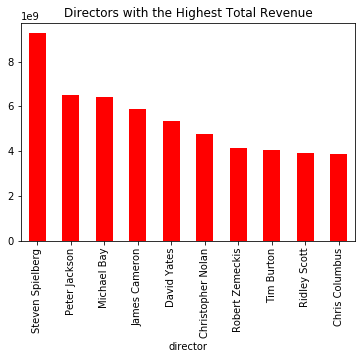

In [17]:
# plt.title('Directors with the Highest Total Revenue')
# df_movies_meta.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
# plt.show()

In [91]:
a = df_movies_meta.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10)
a = a.to_frame()


In [95]:
a = a.reset_index()

In [96]:
fig = px.bar(a, x = 'director', y='revenue')
fig.show()

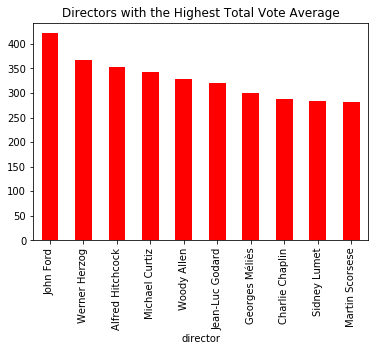

In [97]:
plt.title('Directors with the Highest Total Vote Average')
df_movies_meta.groupby('director')['vote_average'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

In [103]:
b = df_movies_meta.groupby('director')['vote_average'].sum().sort_values(ascending=False).head(10)
b = b.to_frame()
b = b.reset_index()
fig = px.bar(b, x = 'director', y='vote_average')
fig.show()

In [98]:
director_list = df_movies_meta.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

In [99]:
director_list_vote = df_movies_meta.groupby('director')['vote_average'].count().sort_values(ascending=False)
director_list_vote = list(director_list_vote[director_list_vote >= 5].index)

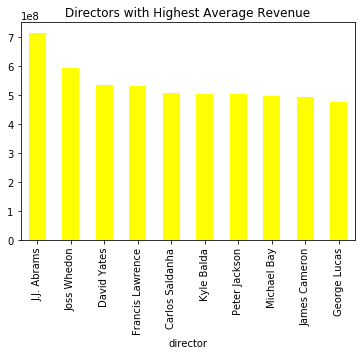

In [100]:
plt.title("Directors with Highest Average Revenue")
df_movies_meta[df_movies_meta['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

In [105]:
c = df_movies_meta[df_movies_meta['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)
c = c.to_frame()
c = c.reset_index()
fig = px.bar(c, x = 'director', y='revenue')
fig.show()

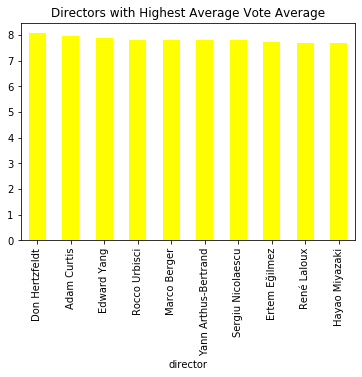

In [101]:
plt.title("Directors with Highest Average Vote Average")
df_movies_meta[df_movies_meta['director'].isin(director_list_vote)].groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()

In [106]:
c = df_movies_meta[df_movies_meta['director'].isin(director_list)].groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10)
c = c.to_frame()
c = c.reset_index()
fig = px.bar(c, x = 'director', y='vote_average')
fig.show()

### Visualização 7: Tempo de duração

In [117]:
df_movies_meta['runtime'].describe()

count    43717.000000
mean        97.408674
std         33.458300
min          1.000000
25%         86.000000
50%         95.000000
75%        107.000000
max        931.000000
Name: runtime, dtype: float64

In [118]:
len(df_movies_meta)

43717

In [119]:
df_movies_meta = df_movies_meta[df_movies_meta.runtime > 0]
df_movies_meta = df_movies_meta[df_movies_meta.runtime < 1000]

In [120]:
len(df_movies_meta)

43717

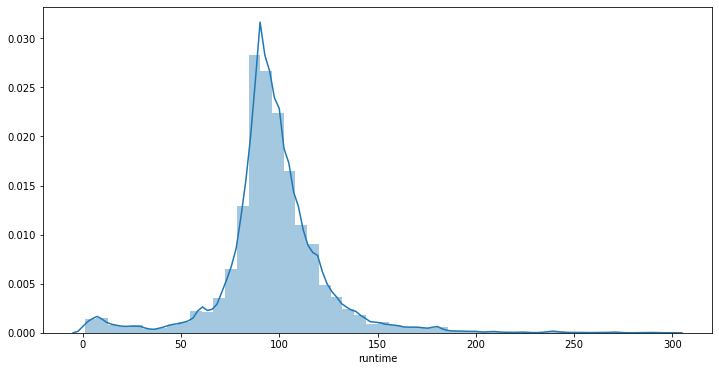

In [121]:
plt.figure(figsize=(12,6))
sns.distplot(df_movies_meta[(df_movies_meta['runtime'] < 300) & (df_movies_meta['runtime'] > 0)]['runtime'])

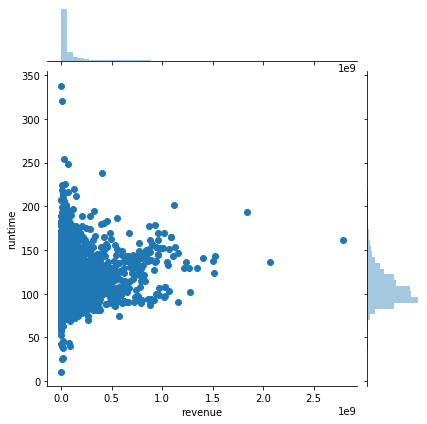

In [122]:
df_mat = df_movies_meta[(df_movies_meta['revenue'].notnull()) & (df_movies_meta['runtime'] > 0) & (df_movies_meta['revenue'] > 0)]
sns.jointplot('revenue', 'runtime', data=df_mat)
plt.show()

In [123]:
fig = px.scatter(df_mat, x="revenue", y="runtime")
fig.show()

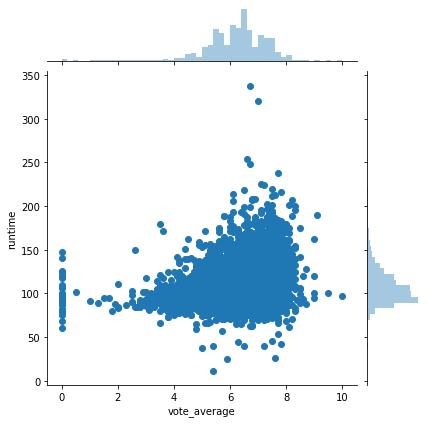

In [124]:
df_mat_2 = df_movies_meta[(df_movies_meta['vote_average'].notnull()) & (df_movies_meta['runtime'] > 0) & (df_movies_meta['vote_average'] > 0 &(df_movies_meta['vote_count'] > 5))]
sns.jointplot('vote_average', 'runtime', data=df_mat)
plt.show()

In [125]:
fig = px.scatter(df_mat_2, x="vote_average", y="runtime")
fig.show()

### Visualização 2D Runtime x Vote_Average \demora muito

In [ ]:
# x = df_movies_meta.vote_average
# y = df_movies_meta.runtime

# colorscale = ['rgb(0, 0, 0)', 'rgb(230,159,0)', 'rgb(86,180,233)'
#                         ,'rgb(0,158,115)', 'rgb(255, 255, 255)']

# fig = ff.create_2d_density(
#     x, y, colorscale=colorscale,
#     hist_color='rgb(255, 0, 0)', point_size=2
# )

# py.iplot(fig, filename='histogram_subplots')

### Visualização 12: Bubble Chart

In [177]:
df_movies_meta['budget'] = df_movies_meta['budget'].astype(float)

In [184]:
df = px.data.gapminder()

fig = px.scatter(df_movies_meta, x="popularity", y="vote_average",
                 size="budget", hover_name="original_title", size_max=50)
fig.show()

In [149]:
df = px.data.gapminder()

AttributeError: 'Series' object has no attribute 'info'